# Topic Modeling, Clustering & Recommendations

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('abcnews-date-text.csv')
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103663 entries, 0 to 1103662
Data columns (total 2 columns):
publish_date     1103663 non-null int64
headline_text    1103663 non-null object
dtypes: int64(1), object(1)
memory usage: 16.8+ MB


In [6]:
data.dtypes

publish_date      int64
headline_text    object
dtype: object

In [7]:
data['publish_year'] = data['publish_date'].apply(lambda x:int(x/10000))
data['publish_month'] = data['publish_date'].apply(lambda x:int(((x)%10000)/100))
data['publish_day'] = data['publish_date'].apply(lambda x:((x)%10000)%100)

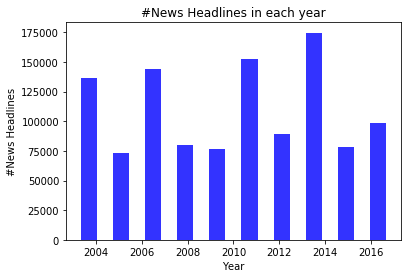

In [13]:
import matplotlib.pyplot as plt
plt.hist(data['publish_year'], facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Year')
plt.ylabel('#News Headlines')
plt.title('#News Headlines in each year')
plt.show()

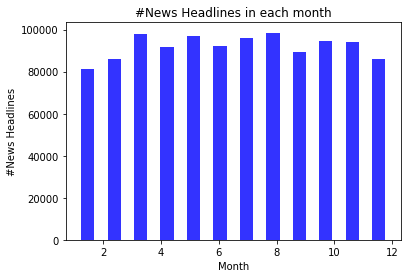

In [14]:
plt.hist(data['publish_month'],12, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Month')
plt.ylabel('#News Headlines')
plt.title('#News Headlines in each month')
plt.show()

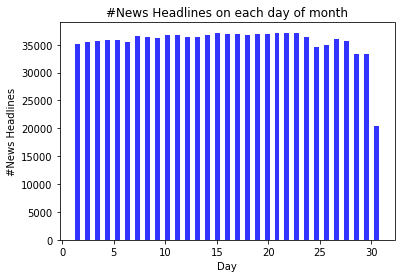

In [15]:
plt.hist(data['publish_day'],31, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Day')
plt.ylabel('#News Headlines')
plt.title('#News Headlines on each day of month')
plt.show()

In [16]:
corp = str()
for i in range(len(data['headline_text'])):
    corp += (' ')+data['headline_text'][i]

In [17]:
import nltk
words = nltk.word_tokenize(corp)
#data['headline_text'][1] + (' ') + data['headline_text'][2] + data['headline_text'][3]

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
f_words = [w for w in words if not w in stop_words] 

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
fp_words = [w for w in f_words if not w in punctuations] 

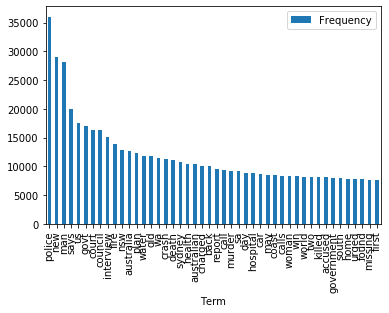

In [19]:
fd = nltk.FreqDist(fp_words)

df_fdist = pd.DataFrame.from_dict(fd, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'

freq_df = df_fdist[df_fdist['Frequency']>500]
d = freq_df.to_dict()['Frequency']

#plt.figure(figsize=(20, 8))
freq_df1 = df_fdist[df_fdist['Frequency']>7500]
freq_df1.sort_values('Frequency',ascending=False).plot(kind='bar')
#freq_df1.columns

<Figure size 2304x2304 with 0 Axes>

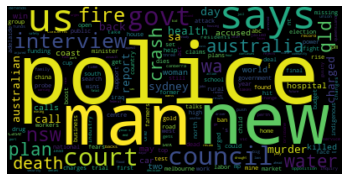

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(32,32))
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import nltk
def text_cleaner(text):
    stop_words = set(stopwords.words('english'))
    f_words = [w for w in nltk.word_tokenize(text) if not w in stop_words] 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    fp_words = [w for w in f_words if not w in punctuations] 
    fp_words_stem = [ps.stem(words) for words in fp_words]
    fp_sent = ' '.join(word for word in fp_words_stem)
    return fp_sent

#text_cleaner(data['headline_text'][1])

In [22]:
data['headline_text_clean'] = data['headline_text'].apply(text_cleaner)
data['headline_text_clean'][:10]

0              aba decid commun broadcast licenc
1                   act fire wit must awar defam
2            g call infrastructur protect summit
3              air nz staff aust strike pay rise
4         air nz strike affect australian travel
5                   ambiti olsson win tripl jump
6               antic delight record break barca
7    aussi qualifi stosur wast four memphi match
8             aust address un secur council iraq
9                   australia lock war timet opp
Name: headline_text_clean, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
vectorizer.fit(data['headline_text_clean'].values)
data_tfidf = vectorizer.transform(data['headline_text_clean'])

tfidf_to_word = np.array(vectorizer.get_feature_names())
#tfidf_to_word

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, solver="mu")
W = nmf.fit_transform(data_tfidf)
H = nmf.components_
#W.shape
#H.shape

In [ ]:
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in tfidf_to_word[topic.argsort()[-10:]]])))

In [ ]:
topic_list = np.array([("Topic" + " "+ str(i)) for i in range(1,51)])
for i,topic in enumerate(W[:10000,]):
    print("Headline {}: {}".format(i+1,",".join([str(x) for x in topic_list[topic.argsort()[-10:]]])))